<title>Calculating avoided emissions from new electricity generation</title>

The accepted _raison d'être_ of new projects generating electricity is that they will avoid carbon-intensive power production, generally from fossil fuels such as coal or fossil gas. However, the actual amount of carbon dioxide, as well as other greenhouse gases, or even other environmental impacts, avoided, could be calculated in many ways, that depend on explicit methodological choices. Avoided emissions are defined as the net difference between "baseline" emissions, which would have occurred should the new project not be developed, and "absolute" (or induced) emissions by the new system.

The methodology is inspired from [the European Investment Bank methodology](https://www.eib.org/attachments/lucalli/eib_project_carbon_footprint_methodologies_2023_en.pdf) and completed with other options considered in [Gibon et al. (2020)](https://iopscience.iop.org/article/10.1088/1748-9326/abaa0c).

If electricity is to be produced from waste heat, the latter is considered as "free" according to the so-called "cut-off" approach in LCA, meaning that only the impacts of its conversion to electricity would be accounted for.

Let us start with importing the ecoinvent database, in its attributional (cut-off) and consequential variants. The latest ecoinvent version that is compatible with brightway is 3.8.

# Importing the data

We will use ecoinvent as well as [this paper](https://doi.org/10.1007/s11367-018-1571-4) as sources for the emission factors.

In [1]:
import brightway2 as bw
import pandas as pd
from bw2data.backends.peewee.proxies import Activity

In [2]:
bw.projects.set_current('avoided_emissions')

In [3]:
bw.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent 3.8 consequential
	ecoinvent 3.8 cutoff

In [4]:
bw.bw2setup()

Biosphere database already present!!! No setup is needed


In [5]:
if 'ecoinvent 3.8 cutoff' not in bw.databases:
    ei38 = bw.SingleOutputEcospold2Importer('D:/Nextcloud/ecoinvent/ecoinvent 3.8_cutoff_ecoSpold02/datasets',
                                       db_name='ecoinvent 3.8 cutoff')
    ei38.apply_strategies()
    ei38.write_database()

In [6]:
if 'ecoinvent 3.8 consequential' not in bw.databases:
    ei38 = bw.SingleOutputEcospold2Importer('D:/Nextcloud/ecoinvent/ecoinvent 3.8_consequential_ecoSpold02/datasets',
                                       db_name='ecoinvent 3.8 consequential')
    ei38.apply_strategies()
    ei38.write_database()

In [7]:
ei38cutoff = bw.Database('ecoinvent 3.8 cutoff')

In [8]:
ei38conseq = bw.Database('ecoinvent 3.8 consequential')

In [9]:
long_term_conseq_mixes = pd.read_excel('data/Environmental_impacts_of_marginal_electricity.xlsx', sheet_name=None)

In [10]:
for df in long_term_conseq_mixes.values():
    df.rename({'Unnamed: 0':'Location'}, axis=1, inplace=True)
    df.set_index('Location', inplace=True)

# Reference activities

We can classify the reference activities as follows:

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0 width="100%"
 style='width:100.0%;border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width="25%" valign=top style='width:25.64%;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  style='font-size:8.0pt'>Substitution scope<o:p></o:p></span></b></p>
  </td>
  <td width="26%" valign=top style='width:26.16%;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  style='font-size:8.0pt'>Attributional <o:p></o:p></span></b></p>
  </td>
  <td width="27%" valign=top style='width:27.26%;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  style='font-size:8.0pt'>Consequential<o:p></o:p></span></b></p>
  </td>
  <td width="20%" valign=top style='width:20.92%;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  style='font-size:8.0pt'>Mixed method<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width="25%" valign=top style='width:25.64%;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Plant-level, operating margin<o:p></o:p></span></p>
  </td>
  <td width="53%" colspan=2 valign=top style='width:53.44%;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Combined cycle gas turbine (CCGT)<o:p></o:p></span></p>
  </td>
  <td width="20%" rowspan=3 valign=top style='width:20.92%;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>X% operating margin (CCGT) + (1-<span class=GramE>X)%</span>
  built margin<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width="25%" valign=top style='width:25.64%;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Grid-level, operating margin<o:p></o:p></span></p>
  </td>
  <td width="26%" valign=top style='width:26.16%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'><o:p>&nbsp;</o:p></span></p>
  </td>
  <td width="27%" valign=top style='width:27.26%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Next MWh being produced from dispatchable capacity<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width="25%" valign=top style='width:25.64%;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Grid-level, short-term built margin<o:p></o:p></span></p>
  </td>
  <td width="26%" valign=top style='width:26.16%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Current mix of the grid (bidding zone) where new
  project is located<o:p></o:p></span></p>
  </td>
  <td width="27%" valign=top style='width:27.26%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Next MW being built<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4;mso-yfti-lastrow:yes'>
  <td width="25%" valign=top style='width:25.64%;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Grid-level, long-term built margin<o:p></o:p></span></p>
  </td>
  <td width="26%" valign=top style='width:26.16%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Foreseen mix of the grid (bidding zone) where new
  project is located<o:p></o:p></span></p>
  </td>
  <td width="27%" valign=top style='width:27.26%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'>Additional capacity over a given period in the future<o:p></o:p></span></p>
  </td>
  <td width="20%" valign=top style='width:20.92%;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  style='font-size:8.0pt'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
</table>

Each cell follows a different assumption and methodological approach, which boils down to considering whether my project will displace
- a specific power plant,
- the operating margin at time of installation,
- the built margin at time of installation,
- the average existing mix at time of installation,
- the average mix over the project's lifetime,
- the built margin over the project's lifetime,
- any mix calculated from a combination of methods above.

We consider the substituted electricity to be high voltage power. This simplifies the calculation as some assumptions above would not be valid in low voltage (a power plant does not deliver low-voltage power).

In [11]:
reference_activities = dict()

## A specific power plant
The EIB methodology falls back on an average combined cycle gas turbine, which is considered the most likely electricity generator to be substituted (fossil gas is very often the marginal source in the European grid's merit order).

Let's see what's in ecoinvent.

In [12]:
act = [a for a in ei38cutoff
       if 'electricity production, natural gas, combined cycle power plant' in a['name']
       and 'LU' in a['location']][0]

In [13]:
reference_activities['Specific power plant'] = {act:1}

## Operating margin at time of installation
This is the response of the grid for an additional 1 kWh of demand. We use the consequential variant of ecoinvent to approximate this.

In [14]:
act = [a for a in ei38conseq
       if 'market for electricity, high voltage' in a['name']
       and 'LU' in a['location']][0]

In [15]:
reference_activities['Operating margin at time of installation'] = {act:1}

## Built margin at time of installation
Here is the limit of ecoinvent, since ecoinvent does not have time series of installed capacity. We resort to Vandepaer et al. (2019). The paper provides pre-calculated LCIA scores.

In [16]:
built_margin_lcia = dict()

for impact, lcia_lu in long_term_conseq_mixes.items():
    built_margin_lcia[impact]  = lcia_lu.loc['LU','Ecoinvent consequential 3.4 (2015-2020)']

In [17]:
reference_activities['Built margin at time of installation'] = pd.Series(built_margin_lcia)

## Average existing mix at time of installation
This is the easiest factor to calculate, and probably the one that comes to mind naturally when thinking about a reference value.

In [18]:
act = [a for a in ei38cutoff
       if 'market for electricity, high voltage' in a['name']
       and 'LU' in a['location']][0]

In [19]:
reference_activities['Average existing mix at time of installation'] = {act:1}

## Average existing mix over project lifetime
(still need to calculate this)

## Built margin over the project's lifetime
The assumption here is that the project would substitute electricity capacity built between 2030 and 2040.

In [20]:
built_margin_lcia = dict()

for impact, lcia_lu in long_term_conseq_mixes.items():
    built_margin_lcia[impact]  = lcia_lu.loc['LU','Ecoinvent consequential 3.4 (2030-2040)']

In [21]:
reference_activities['Built margin over project lifetime'] = pd.Series(built_margin_lcia)

## Mixed method
Here we will build a functional unit made two methods.

The [IFI methodology](https://www.eib.org/attachments/documents/ifi_framework_for_harmonised_approach_to_gga_renewable_energy_en.pdf) recommends
- a 75% operating margin/25% built margin split for renewable (non-dispatchable) projects,
- 50%/50% for dispatchable projects

We will add it once the results are calculated.

# Calculation

In [43]:
# We use the same methodology as in Vandepaer et al. for simplicity
impacts = [m for m in bw.methods if 'ReCiPe Midpoint (H)' == m[0]]

In [45]:
my_calculation_setup = {'inv': [act for act in reference_activities.values() if type([*act.keys()][0]) == Activity],
                        'ia': impacts}

In [46]:
approaches = [approach for approach,act in reference_activities.items() if type([*act.keys()][0]) == Activity]

In [47]:
bw.calculation_setups['baselines'] = my_calculation_setup

In [48]:
bw.calculation_setups

CalculationSetups dictionary with 1 object(s):
	baselines

In [49]:
mlca = bw.MultiLCA('baselines')

In [77]:
ei_impacts = pd.DataFrame(mlca.results,
             columns=pd.MultiIndex.from_tuples([m for m in mlca.methods], names=('methodology', 'category', 'indicator')),
             index=approaches).droplevel([0,2],axis=1)

In [79]:
keys = ['Built margin at time of installation','Built margin over project lifetime']

vdp_impacts = pd.DataFrame([reference_activities[k] for k in keys], index=keys)

In [85]:
all_impacts = pd.concat([ei_impacts,vdp_impacts])

In [107]:
all_impacts.loc['Mixed method'] = .5 * all_impacts.loc['Operating margin at time of installation'] \
                                + .5 * all_impacts.loc['Built margin at time of installation']

Now we can plot the various values for the baselines we defined. Let's pick the climate change indicator first.

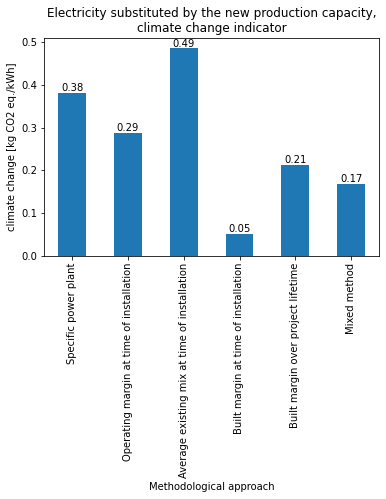

In [113]:
imp = 'climate change'
unit = 'kg CO2 eq./kWh'

ax = all_impacts[imp].plot.bar()
ax.set_ylabel(f'{imp} [{unit}]')
ax.set_xlabel('Methodological approach')
ax.set_title(f'Electricity substituted by the new production capacity,\n{imp} indicator')

for i,t in enumerate(all_impacts[imp]):
    ax.text(i,t,f'{t:.2f}',
           horizontalalignment='center',
           verticalalignment='bottom')

# Note on additionality
A first prerequisite before delving into details and methodological choices is to guarantee what is called the “additionality” of a new project, i.e. the assurance that said project, financed by a given party, would not have been financed by any other party if the investment did not occur. Guaranteeing additionality ensures that avoided emissions will only be attributed to one party, thereby avoiding any chance of double-counting, necessary to the integrity of the accounting framework.